In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

SAVEFIG_PATH = '../reports/figures/'
SAVE_FIGURES = True

In [2]:
registrations = pd.read_csv('../datafiles/links/LINKS_Zeeland_cleaned_2016_01_Registrations.csv', sep=';')
persons = pd.read_csv('../datafiles/links/LINKS_Zeeland_cleaned_2016_01_Persons.csv', sep=';')
locations = pd.read_csv('../datafiles/links/LINKS_Zeeland_cleaned_2016_01_Locations_v2.csv', sep=';')

/home/wouter/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/wouter/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (14,21,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print "Aantal registraties: ", registrations.id_registration.unique().shape[0]
print "Jaar eerste registratie: ", registrations.registration_year.unique().min()
print "Jaar laatste registratie: ", registrations.registration_year.unique().max()

Aantal registraties:  1558205
Jaar eerste registratie:  1796
Jaar laatste registratie:  1969


In [66]:

y = registrations[['registration_maintype','registration_year', 'id_registration']].groupby(['registration_year','registration_maintype']).count().rename(columns={'id_registration':'Count'}).reset_index()
y = y[y.Count > 55]
y[y.registration_maintype == 1]

,registration_year,registration_maintype,Count
0,1796,1,518
3,1797,1,1556
6,1798,1,1757
9,1799,1,1777
12,1800,1,1794
15,1801,1,1780
18,1802,1,1762
21,1803,1,1724
24,1804,1,1678
27,1805,1,1659


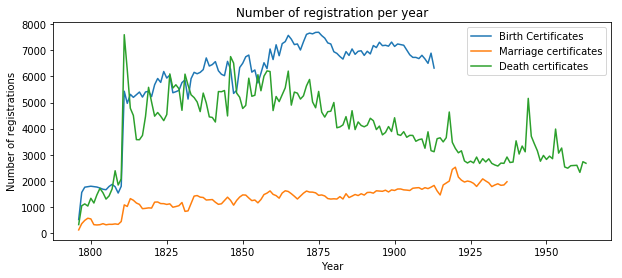

In [69]:
years_per_bin = 1
num_bins = ((registrations.registration_year.unique().max() - registrations.registration_year.unique().min()) / years_per_bin) + 1
bins = np.linspace(registrations.registration_year.unique().min(), registrations.registration_year.unique().max(), num_bins)
registrations.groupby(['registration_maintype', 'registration_year'])

#plt.show()
y = registrations[['registration_maintype','registration_year', 'id_registration']].groupby(['registration_year','registration_maintype']).count().rename(columns={'id_registration':'Count'})
y = y[y.Count > 55]
ax = y.unstack().plot(title="Number of registration per year", figsize=(10,4))
ax.set_ylabel('Number of registrations')
ax.set_xlabel('Year')
ax.legend(['Birth Certificates', 'Marriage certificates', 'Death certificates'])
fig = ax.get_figure()
if SAVE_FIGURES: fig.savefig(SAVEFIG_PATH + 'opbouw_registrations.png', bbox_inches='tight')
plt.show()

In [5]:
registrations[registrations.registration_maintype == 3].sort_values(['registration_year'], ascending=False)

,id_registration,registration_maintype,registration_type,extract,registration_location,registration_day,registration_month,registration_year,registration_seq,registration_flag
1200478,1200909,3,o,NaN,4098.0,2,9,1966,2,NaN
1516472,1517076,3,o,NaN,4098.0,29,5,1966,5,NaN
985162,985520,3,o,NaN,4098.0,22,5,1966,4,NaN
1280977,1281447,3,o,NaN,4098.0,21,2,1966,1,NaN
1365425,1365931,3,o,NaN,4098.0,5,5,1966,3,NaN
1242733,1243186,3,o,NaN,4098.0,5,8,1965,3,NaN
899952,900286,3,o,NaN,4098.0,29,6,1965,1,NaN
1285369,1285840,3,o,NaN,4098.0,21,7,1965,2,NaN
979508,979864,3,o,NaN,4098.0,13,8,1965,4,NaN
910635,910971,3,o,NaN,4098.0,16,8,1964,4,NaN


In [6]:
print "Aantal geboorte-akten: ", registrations[registrations.registration_maintype==1].shape[0]
print "Aantal trouwakten: ", registrations[registrations.registration_maintype==2].shape[0]
print "Aantal overlijdensakten: ", registrations[registrations.registration_maintype==3].shape[0]


Aantal geboorte-akten:  698285
Aantal trouwakten:  193921
Aantal overlijdensakten:  665999


In [7]:
from collections import Counter
unieke_voornamen = Counter()
unieke_mannen_voornamen = Counter()
unieke_vrouwen_voornamen = Counter()

In [8]:
voornamen = persons.firstname.fillna('Geen_naam').str.split(' ').apply(unieke_voornamen.update)
voornamen_mannen = persons[persons.sex == 'm'].firstname.fillna('Geen_naam').str.split(' ').apply(unieke_mannen_voornamen.update)
voornamen_vouwen = persons[persons.sex == 'f'].firstname.fillna('Geen_naam').str.split(' ').apply(unieke_vrouwen_voornamen.update)

In [9]:
print unieke_voornamen.most_common(100)
print unieke_mannen_voornamen.most_common(100)
print unieke_vrouwen_voornamen.most_common(100)


[('maria', 405128), ('pieter', 254606), ('johanna', 234204), ('jan', 230823), ('cornelis', 213435), ('cornelia', 198172), ('johannes', 189151), ('Geen_naam', 179941), ('jacobus', 166204), ('pieternella', 148507), ('adriana', 143932), ('catharina', 132243), ('adriaan', 125410), ('marinus', 117102), ('willem', 108309), ('anna', 106928), ('jacoba', 94175), ('jacob', 85682), ('abraham', 78250), ('janna', 76565), ('maatje', 73064), ('elisabeth', 72949), ('elizabeth', 63657), ('neeltje', 62700), ('hendrik', 58231), ('petrus', 54889), ('franciscus', 51028), ('jannetje', 49882), ('johannis', 48925), ('sara', 47704), ('leendert', 47556), ('wilhelmina', 42252), ('levenloos', 41989), ('willemina', 41336), ('jacomina', 38860), ('suzanna', 37314), ('francies', 35515), ('josephus', 34891), ('marie', 33829), ('dina', 31018), ('lena', 29712), ('christina', 29688), ('helena', 28874), ('izaak', 27980), ('sophia', 26947), ('bernardus', 26747), ('tannetje', 26142), ('magdalena', 26073), ('jozina', 25716),

In [19]:
registrations[(registrations.registration_year == 1810) | (registrations.registration_year == 1811)][['registration_year', 'registration_location', 'id_registration']].groupby(['registration_year', 'registration_location']).count().unstack(level=0)

id_registration        
registration_year                1810    1811
registration_location                        
4.0                               NaN    36.0
17.0                             96.0   102.0
166.0                             NaN   107.0
201.0                           206.0   205.0
208.0                             NaN    52.0
413.0                           124.0   113.0
415.0                             NaN    31.0
484.0                             NaN    36.0
524.0                             NaN    66.0
527.0                            46.0    48.0
566.0                           134.0   142.0
578.0                             NaN    27.0
598.0                             NaN    89.0
608.0                             NaN   102.0
652.0                             NaN    38.0
664.0                             NaN    15.0
674.0                            67.0    64.0
721.0                           146.0   166.0
729.0                             NaN   139.0
933.0                             NaN    66.0
947.0                             NaN    45.0
973.0                             NaN     5.0
1016.0                           88.0   107.0
1072.0                            NaN    24.0
1075.0                            NaN    32.0
1078.0                            NaN    32.0
1190.0                            NaN     2.0
1219.0                            NaN    39.0
1255.0                            NaN    15.0
1359.0                            NaN   422.0
...                               ...     ...
3902.0                            NaN   172.0
3915.0                            NaN     5.0
3919.0                            NaN    34.0
4000.0                            NaN     1.0
4001.0                            NaN   133.0
4017.0                            NaN   112.0
4045.0                            NaN    85.0
4047.0                          147.0   123.0
4088.0                            NaN   670.0
4097.0                            NaN    32.0
4098.0                            NaN    28.0
4107.0                           54.0    54.0
4121.0                           60.0    72.0
5434.0                          136.0   174.0
6082.0                            NaN     3.0
6176.0                           51.0    60.0
7028.0                           62.0    79.0
8369.0                            NaN     8.0
8402.0                            NaN    11.0
8520.0                            NaN    54.0
8521.0                            NaN    13.0
9119.0                            NaN     6.0
9325.0                            NaN    14.0
9452.0                            NaN     1.0
9453.0                            NaN     9.0
9459.0                            NaN    29.0
9622.0                            NaN     6.0
9860.0                            NaN     2.0
9890.0                            NaN  3233.0
10010.0                           NaN    54.0

[139 rows x 2 columns]

In [32]:
birth_candidates = pd.read_csv('../datafiles/links/input/geboorte_ouders.csv', sep="|", index_col=False, header=None)
mar_candidates = pd.read_csv('../datafiles/links/input/huwelijk_ouders.csv', sep="|", index_col=False, header=None)
death_candidates = pd.read_csv('../datafiles/links/input/overlijden_ouders.csv', sep="|", index_col=False, header=None)

In [33]:
birth_candidates.columns = ['id', 'first_name_male', 'fam_name_male', 'first_name_female', 'fam_name_female']
mar_candidates.columns = ['id', 'first_name_male', 'fam_name_male', 'first_name_female', 'fam_name_female']
death_candidates.columns = ['id', 'first_name_male', 'fam_name_male', 'first_name_female', 'fam_name_female']


In [39]:
birth_candidates['len_vnm'] = birth_candidates.first_name_male.str.len().fillna(0).astype(int)
birth_candidates['len_fnm'] = birth_candidates.fam_name_male.str.len().fillna(0).astype(int)
birth_candidates['len_vnv'] = birth_candidates.first_name_female.str.len().fillna(0).astype(int)
birth_candidates['len_fnv'] = birth_candidates.fam_name_female.str.len().fillna(0).astype(int)

In [41]:
mar_candidates['len_vnm'] = mar_candidates.first_name_male.str.len().fillna(0).astype(int)
mar_candidates['len_fnm'] = mar_candidates.fam_name_male.str.len().fillna(0).astype(int)
mar_candidates['len_vnv'] = mar_candidates.first_name_female.str.len().fillna(0).astype(int)
mar_candidates['len_fnv'] = mar_candidates.fam_name_female.str.len().fillna(0).astype(int)

In [42]:
death_candidates['len_vnm'] = death_candidates.first_name_male.str.len().fillna(0).astype(int)
death_candidates['len_fnm'] = death_candidates.fam_name_male.str.len().fillna(0).astype(int)
death_candidates['len_vnv'] = death_candidates.first_name_female.str.len().fillna(0).astype(int)
death_candidates['len_fnv'] = death_candidates.fam_name_female.str.len().fillna(0).astype(int)

In [48]:
all_registrations = pd.DataFrame().append(birth_candidates).append(mar_candidates).append(death_candidates)

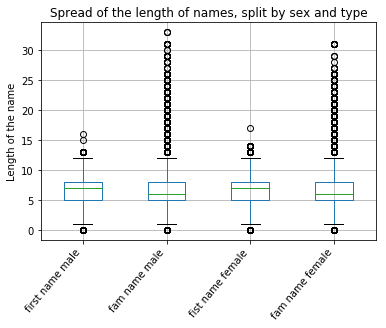

In [68]:
fig, ax = plt.subplots()
all_registrations[['len_vnm', 'len_fnm', 'len_vnv', 'len_fnv']].boxplot()
ax.set_xticklabels(['first name male', 'fam name male', 'fist name female', 'fam name female'], rotation=50, ha='right')
ax.set_title("Spread of the length of names, split by sex and type")
ax.set_ylabel('Length of the name')
fig.savefig('../reports/figures/spread_of_name_length', bbox_inches='tight')
plt.show()

In [71]:
all_registrations[['len_vnm', 'len_fnm', 'len_vnv', 'len_fnv']].describe()

,len_vnm,len_fnm,len_vnv,len_fnv
count,1.750182e+06,1.750182e+06,1.750182e+06,1.750182e+06
mean,6.095911e+00,6.265960e+00,6.791278e+00,6.466958e+00
std,2.302867e+00,2.656707e+00,2.228525e+00,2.421217e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
50%,7.000000e+00,6.000000e+00,7.000000e+00,6.000000e+00
75%,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
max,1.600000e+01,3.300000e+01,1.700000e+01,3.100000e+01
